In [5]:
import numpy as np

In [7]:
import pandas as pd

In [57]:
import matplotlib.pyplot as plt

In [64]:
import seaborn as sns

In [6]:
np.random.seed(42)

In [44]:
apartments = [f"apt_{i}" for i in range(1, 21)]

In [45]:
dates=pd.date_range(start="2025-07-01",periods = 30,freq="D")

In [46]:
date ={ 
        "Date":np.tile(dates,len(apartments)),
        "Apartment":np.repeat(apartments,len(dates)),
        "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))
}

In [47]:
df=pd.DataFrame(date)

In [48]:
df

,Date,Apartment,Electricity_usage
0,2025-07-01,apt_1,20.626123
1,2025-07-02,apt_1,17.852972
2,2025-07-03,apt_1,20.611488
3,2025-07-04,apt_1,22.716490
4,2025-07-05,apt_1,20.244300
...,...,...,...
595,2025-07-26,apt_20,16.240153
596,2025-07-27,apt_20,18.404730
597,2025-07-28,apt_20,16.019871
598,2025-07-29,apt_20,25.380036


In [49]:
df["Electricity_usage"]=df["Electricity_usage"].round(2)

In [50]:
df

,Date,Apartment,Electricity_usage
0,2025-07-01,apt_1,20.63
1,2025-07-02,apt_1,17.85
2,2025-07-03,apt_1,20.61
3,2025-07-04,apt_1,22.72
4,2025-07-05,apt_1,20.24
...,...,...,...
595,2025-07-26,apt_20,16.24
596,2025-07-27,apt_20,18.40
597,2025-07-28,apt_20,16.02
598,2025-07-29,apt_20,25.38


In [51]:
df.isnull().sum()

Date                 0
Apartment            0
Electricity_usage    0
dtype: int64

In [52]:
print(df.describe())

                      Date  Electricity_usage
count                  600         600.000000
mean   2025-07-15 12:00:00          20.336233
min    2025-07-01 00:00:00           5.390000
25%    2025-07-08 00:00:00          16.947500
50%    2025-07-15 12:00:00          20.210000
75%    2025-07-23 00:00:00          23.560000
max    2025-07-30 00:00:00          35.970000
std                    NaN           4.953919


In [53]:
print(df.dtypes)

Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


In [54]:
usage_per_apartment = df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending = False)
print(usage_per_apartment)

Apartment
apt_15    645.67
apt_8     645.50
apt_10    643.77
apt_9     637.22
apt_19    632.46
apt_7     630.21
apt_4     623.98
apt_16    623.58
apt_17    622.54
apt_11    620.02
apt_18    614.47
apt_1     612.33
apt_2     597.50
apt_14    591.52
apt_5     590.71
apt_3     588.41
apt_12    580.01
apt_13    570.64
apt_6     567.89
apt_20    563.31
Name: Electricity_usage, dtype: float64


In [54]:
usage_per_apartment = df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending = False)
print(usage_per_apartment)

Apartment
apt_15    645.67
apt_8     645.50
apt_10    643.77
apt_9     637.22
apt_19    632.46
apt_7     630.21
apt_4     623.98
apt_16    623.58
apt_17    622.54
apt_11    620.02
apt_18    614.47
apt_1     612.33
apt_2     597.50
apt_14    591.52
apt_5     590.71
apt_3     588.41
apt_12    580.01
apt_13    570.64
apt_6     567.89
apt_20    563.31
Name: Electricity_usage, dtype: float64


In [63]:
# Group by both Date and plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index,y= usage_per_apartment
plt.xticks(rotation=90)
plt.title("Total usgae per Apartments")
plt.xlable("Apartment")
plt.ylable("Total KWH")
plt.tight_layout()
, then calculate average usage
daily_avg = df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head())


Date
2025-07-01    21.3085
2025-07-02    18.6025
2025-07-03    19.6760
2025-07-04    21.9270
2025-07-05    18.8155
Name: Electricity_usage, dtype: float64


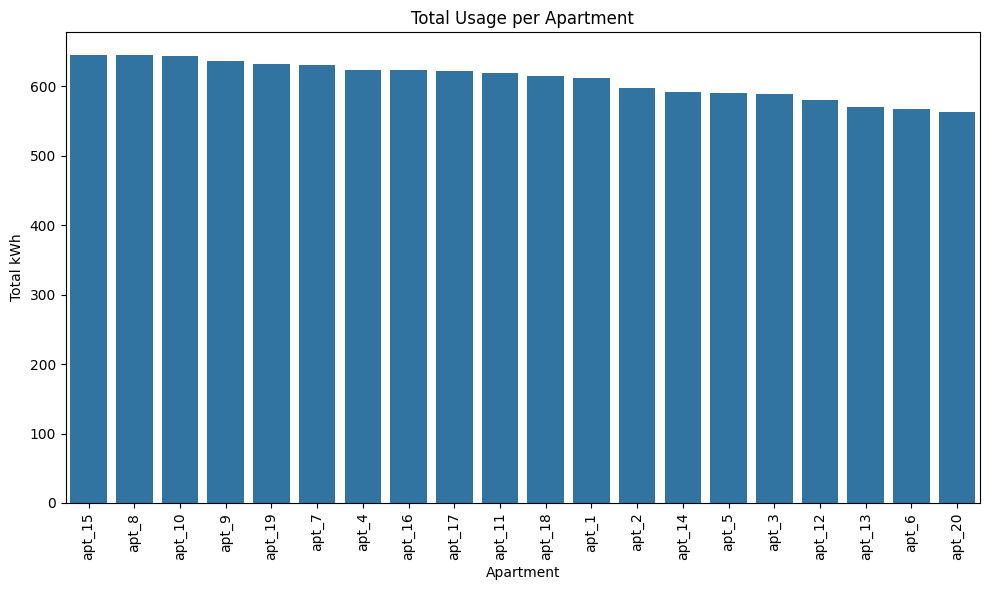

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x=usage_per_apartment.index, y=usage_per_apartment.values)

plt.xticks(rotation=90)
plt.title("Total Usage per Apartment")
plt.xlabel("Apartment")       
plt.ylabel("Total kWh")       
plt.tight_layout()

plt.show()

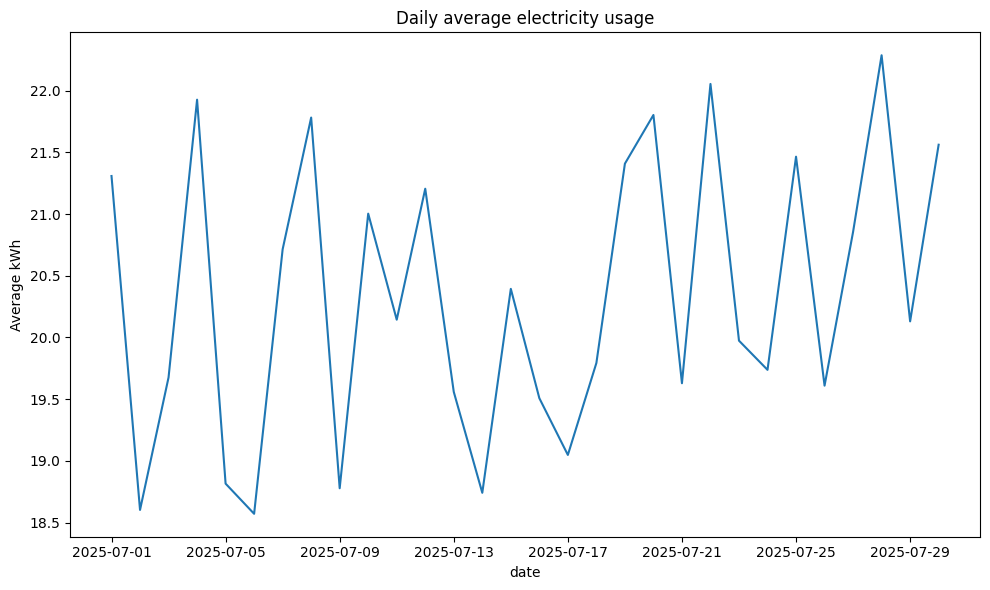

In [71]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_avg.index, y=daily_avg.values)
plt.title("Daily average electricity usage")
plt.xlabel("date")       
plt.ylabel("Average kWh")       
plt.tight_layout()
plt.show()

In [75]:
threshold = df["Electricity_usage"].mean() + 2 * df["Electricity_usage"].std()

df["High_Usage_flag"] = df["Electricity_usage"] > threshold

print(df[df["High_Usage_flag"] == True].head())


         Date Apartment  Electricity_usage  High_Usage_flag
19 2025-07-20     apt_1              30.73             True
29 2025-07-30     apt_1              31.05             True
33 2025-07-04     apt_2              32.90             True
76 2025-07-17     apt_3              31.60             True
91 2025-07-02     apt_4              32.46             True
